In [1]:
# This makes tesselation patterns for PCA decompositions

# created 2019 Oct 26 by E.S.

In [31]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from scipy import ndimage
from astropy.io import fits
from matplotlib.colors import LogNorm
import matplotlib.colors as colors
import matplotlib.cm as cmx

#%matplotlib inline
%matplotlib qt

In [2]:
lmir_PS = 0.0107 # LMIR plate scale (asec per pixel)

In [3]:
# Airy ring positions in lambda/D

first_dark = 1.220
second_dark = 2.233
third_dark = 3.238
fourth_dark = 4.241
fifth_dark = 5.243

first_bright = 1.635
second_bright = 2.679
third_bright = 3.69
fourth_bright = 4.71
fifth_bright = 5.71

In [4]:
lambda_over_D_pix = np.divide(4.05e-6,8.25)*(206264.8/lmir_PS)

In [5]:
# Airy ring positions in pix

first_dark_pix = np.multiply(1.220,lambda_over_D_pix)
second_dark_pix = np.multiply(2.233,lambda_over_D_pix)
third_dark_pix = np.multiply(3.238,lambda_over_D_pix)
fourth_dark_pix = np.multiply(4.241,lambda_over_D_pix)
fifth_dark_pix = np.multiply(5.243,lambda_over_D_pix)

first_bright_pix = np.multiply(1.635,lambda_over_D_pix)
second_bright_pix = np.multiply(2.679,lambda_over_D_pix)
third_bright_pix = np.multiply(3.69,lambda_over_D_pix)
fourth_bright_pix = np.multiply(4.71,lambda_over_D_pix)
fifth_bright_pix = np.multiply(5.71,lambda_over_D_pix)

In [18]:
first_dark_pix

11.545220920985555

In [13]:
third_dark_pix

30.642151919796092

In [12]:
fourth_dark_pix

40.13383764418011

In [11]:
fifth_dark_pix

49.61606007272727

In [14]:
# circular mask

def create_circular_mask(image, center=None, radius=None):

    h, w = np.shape(image)
    
    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

In [6]:
# initialize a grid

x = np.arange(0, 406)
y = np.arange(0, 406)
xv, yv = np.meshgrid(x, y)

In [7]:
dummy_frame = np.ones((406,406))

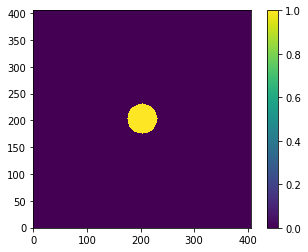

In [17]:
# make simple circle

# initialize a grid
x = np.arange(0, 406)
y = np.arange(0, 406)
xv, yv = np.meshgrid(x, y)

mask_circle = create_circular_mask(dummy_frame, radius = 28)

# turn to integers
plt.imshow(mask_circle.astype(int), origin="lower")
plt.colorbar()
plt.show()

# write FITS
hdu = fits.PrimaryHDU(mask_circle.astype(int))
hdul = fits.HDUList([hdu])
#hdul.writeto('mask_100x100_rad028.fits', overwrite=True)

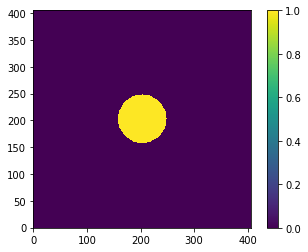

In [63]:
# more circles

# initialize a grid
x = np.arange(0, 406)
y = np.arange(0, 406)
xv, yv = np.meshgrid(x, y)

mask_circle = create_circular_mask(dummy_frame, radius = 45)

# turn to integers
plt.imshow(mask_circle.astype(int), origin="lower")
plt.colorbar()
plt.show()

# write as array
mask_circle_045 = np.copy(mask_circle.astype(int))

# write FITS
#hdu = fits.PrimaryHDU(mask_circle.astype(int))
#hdul = fits.HDUList([hdu])
#hdul.writeto('mask_100x100_rad_fourth_bright_pix.fits', overwrite=True)

In [40]:
mask_circle_195

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [118]:
ring_185_to_195 = np.subtract(mask_circle_195,mask_circle_185)
ring_175_to_185 = np.subtract(mask_circle_185,mask_circle_175)
ring_165_to_175 = np.subtract(mask_circle_175,mask_circle_165)
ring_155_to_165 = np.subtract(mask_circle_165,mask_circle_155)
ring_145_to_155 = np.subtract(mask_circle_155,mask_circle_145)
ring_135_to_145 = np.subtract(mask_circle_145,mask_circle_135)
ring_125_to_135 = np.subtract(mask_circle_135,mask_circle_125)
ring_115_to_125 = np.subtract(mask_circle_125,mask_circle_115)
ring_105_to_115 = np.subtract(mask_circle_115,mask_circle_105)
ring_095_to_105 = np.subtract(mask_circle_105,mask_circle_095)
ring_085_to_095 = np.subtract(mask_circle_095,mask_circle_085)
ring_075_to_085 = np.subtract(mask_circle_085,mask_circle_075)
ring_065_to_075 = np.subtract(mask_circle_075,mask_circle_065)
ring_055_to_065 = np.subtract(mask_circle_065,mask_circle_055)
ring_045_to_055 = np.subtract(mask_circle_055,mask_circle_045)
ring_045_to_055[idx[0],idx[1]] = 1# add-on of stray pixels
square_406x406 = np.subtract(np.ones((406,406)),mask_circle_195)

In [119]:
cube_rings = np.nan*np.ones((64,406,406))

In [120]:
# put 4 sets (for 4 quadrants of ring images into the cube)

cube_rings[0,:,:] = ring_045_to_055
cube_rings[1,:,:] = ring_055_to_065
cube_rings[2,:,:] = ring_065_to_075
cube_rings[3,:,:] = ring_075_to_085
cube_rings[4,:,:] = ring_085_to_095
cube_rings[5,:,:] = ring_095_to_105
cube_rings[6,:,:] = ring_105_to_115
cube_rings[7,:,:] = ring_115_to_125
cube_rings[8,:,:] = ring_125_to_135
cube_rings[9,:,:] = ring_135_to_145
cube_rings[10,:,:] = ring_145_to_155
cube_rings[11,:,:] = ring_155_to_165
cube_rings[12,:,:] = ring_165_to_175
cube_rings[13,:,:] = ring_175_to_185
cube_rings[14,:,:] = ring_185_to_195
cube_rings[15,:,:] = square_406x406

cube_rings[16,:,:] = ring_045_to_055
cube_rings[17,:,:] = ring_055_to_065
cube_rings[18,:,:] = ring_065_to_075
cube_rings[19,:,:] = ring_075_to_085
cube_rings[20,:,:] = ring_085_to_095
cube_rings[21,:,:] = ring_095_to_105
cube_rings[22,:,:] = ring_105_to_115
cube_rings[23,:,:] = ring_115_to_125
cube_rings[24,:,:] = ring_125_to_135
cube_rings[25,:,:] = ring_135_to_145
cube_rings[26,:,:] = ring_145_to_155
cube_rings[27,:,:] = ring_155_to_165
cube_rings[28,:,:] = ring_165_to_175
cube_rings[29,:,:] = ring_175_to_185
cube_rings[30,:,:] = ring_185_to_195
cube_rings[31,:,:] = square_406x406

cube_rings[32,:,:] = ring_045_to_055
cube_rings[33,:,:] = ring_055_to_065
cube_rings[34,:,:] = ring_065_to_075
cube_rings[35,:,:] = ring_075_to_085
cube_rings[36,:,:] = ring_085_to_095
cube_rings[37,:,:] = ring_095_to_105
cube_rings[38,:,:] = ring_105_to_115
cube_rings[39,:,:] = ring_115_to_125
cube_rings[40,:,:] = ring_125_to_135
cube_rings[41,:,:] = ring_135_to_145
cube_rings[42,:,:] = ring_145_to_155
cube_rings[43,:,:] = ring_155_to_165
cube_rings[44,:,:] = ring_165_to_175
cube_rings[45,:,:] = ring_175_to_185
cube_rings[46,:,:] = ring_185_to_195
cube_rings[47,:,:] = square_406x406

cube_rings[48,:,:] = ring_045_to_055
cube_rings[49,:,:] = ring_055_to_065
cube_rings[50,:,:] = ring_065_to_075
cube_rings[51,:,:] = ring_075_to_085
cube_rings[52,:,:] = ring_085_to_095
cube_rings[53,:,:] = ring_095_to_105
cube_rings[54,:,:] = ring_105_to_115
cube_rings[55,:,:] = ring_115_to_125
cube_rings[56,:,:] = ring_125_to_135
cube_rings[57,:,:] = ring_135_to_145
cube_rings[58,:,:] = ring_145_to_155
cube_rings[59,:,:] = ring_155_to_165
cube_rings[60,:,:] = ring_165_to_175
cube_rings[61,:,:] = ring_175_to_185
cube_rings[62,:,:] = ring_185_to_195
cube_rings[63,:,:] = square_406x406

In [121]:
# quadrant 1
cube_rings[0:16,:203,:] = 0
cube_rings[0:16,:,:203] = 0

idx

# quadrant 2
cube_rings[48:,:203,:] = 0
cube_rings[48:,:,203:] = 0

# quadrant 3
cube_rings[32:48,203:,:] = 0
cube_rings[32:48,:,203:] = 0

# quadrant 4
cube_rings[16:32,203:,:] = 0
cube_rings[16:32,:,:203] = 0

In [85]:
# turn zeros to nans

cube_rings[cube_rings == 0.] = np.nan

In [122]:
# write

hdu = fits.PrimaryHDU(cube_rings.astype(int))
hdul = fits.HDUList([hdu])
#hdul.writeto('junk_mask_406x406_rings_4quad_complete.fits', overwrite=True)

In [35]:
# quad4 mask definition
slices = 4
this_cube = np.zeros((slices,100,100))

this_slice = np.zeros((100,100))
this_slice[50:,50:] = 1
this_cube[0,:,:] = this_slice

this_slice = np.zeros((100,100))
this_slice[50:,:50] = 1
this_cube[1,:,:] = this_slice

this_slice = np.zeros((100,100))
this_slice[:50,:50] = 1
this_cube[2,:,:] = this_slice

this_slice = np.zeros((100,100))
this_slice[:50,50:] = 1
this_cube[3,:,:] = this_slice

#hdu = fits.PrimaryHDU(this_cube.astype(int))
#hdul = fits.HDUList([hdu])
#hdul.writeto('mask_100x100_4quad.fits', overwrite=True)

OrderedDict()

In [88]:
# 100 squares mask definition
slices = 100
this_cube = np.zeros((slices,100,100))

slice_num = 0

# y
for i in range(0,10):
    # x
    for j in range(0,10):
        this_slice = np.zeros((100,100))
        this_slice[10*i:10*(i+1),10*j:10*(j+1)] = 1
        this_cube[slice_num,:,:] = this_slice
        slice_num += 1

hdu = fits.PrimaryHDU(this_cube.astype(int))
hdul = fits.HDUList([hdu])
hdul.writeto('mask_10x10_100squares.fits', overwrite=True)

In [7]:
# simple whole-frame 100x100 mask definition

# note this has two redundant slices, because otherwise the dimensions get messed up
this_slice = np.ones((2,100,100))

hdu = fits.PrimaryHDU(this_slice.astype(int))
hdul = fits.HDUList([hdu])
hdul.writeto('mask_100x100pix_whole_frame.fits', overwrite=True)

In [10]:
# center_strip_lamb_over_B mask definition
# 1= good; 0= bad

slices = 2
this_cube = np.zeros((slices,406,406))
dummy_frame = np.zeros((406,406))

# define central strip
this_slice1 = np.copy(dummy_frame)
this_slice1[198:208,149:257] = 1
this_cube[0,:,:] = this_slice1

# now the region outside the strip
this_slice2 = np.subtract(dummy_frame,this_slice1)
this_cube[1,:,:] = this_slice2

# write out
hdu = fits.PrimaryHDU(this_cube.astype(int))
hdul = fits.HDUList([hdu])
hdul.writeto('center_strip_lamb_over_B.fits', overwrite=True)

In [102]:
# quad4_circ mask definition
# 1= good; 0= bad

slices = 8
this_cube = np.zeros((slices,100,100))
dummy_frame = np.ones((100,100))

# define quadrants across slices first
this_slice = np.zeros((100,100))
this_slice[50:,50:] = 1
this_cube[0,:,:] = this_slice
this_cube[4,:,:] = this_slice

this_slice = np.zeros((100,100))
this_slice[50:,:50] = 1
this_cube[1,:,:] = this_slice
this_cube[5,:,:] = this_slice

this_slice = np.zeros((100,100))
this_slice[:50,:50] = 1
this_cube[2,:,:] = this_slice
this_cube[6,:,:] = this_slice

this_slice = np.zeros((100,100))
this_slice[:50,50:] = 1
this_cube[3,:,:] = this_slice
this_cube[7,:,:] = this_slice

# now, multiply the first set of slices by a circular mask
mask_circle = create_circular_mask(dummy_frame, radius = 22)
this_cube[0:4,:,:] = np.multiply(this_cube[0:4,:,:],mask_circle)

# and multiply the second set of slices by the inverse circular mask
this_cube[4:,:,:] = np.multiply(this_cube[4:,:,:],np.abs(np.subtract(mask_circle,1)))

# write out
hdu = fits.PrimaryHDU(this_cube.astype(int))
hdul = fits.HDUList([hdu])
hdul.writeto('mask_quad4_circ.fits', overwrite=True)

In [122]:
# quad4_circ_ring mask definition
# 1= good; 0= bad

slices = 12
this_cube = np.zeros((slices,100,100))
dummy_frame = np.ones((100,100))

# define quadrants across slices first
this_slice = np.zeros((100,100))
this_slice[50:,50:] = 1
this_cube[0,:,:] = this_slice
this_cube[4,:,:] = this_slice
this_cube[8,:,:] = this_slice

this_slice = np.zeros((100,100))
this_slice[50:,:50] = 1
this_cube[1,:,:] = this_slice
this_cube[5,:,:] = this_slice
this_cube[9,:,:] = this_slice

this_slice = np.zeros((100,100))
this_slice[:50,:50] = 1
this_cube[2,:,:] = this_slice
this_cube[6,:,:] = this_slice
this_cube[10,:,:] = this_slice

this_slice = np.zeros((100,100))
this_slice[:50,50:] = 1
this_cube[3,:,:] = this_slice
this_cube[7,:,:] = this_slice
this_cube[11,:,:] = this_slice

# now, multiply the first set of slices by a circular mask
mask_circle_inner = create_circular_mask(dummy_frame, radius = 12)
mask_circle_outer = create_circular_mask(dummy_frame, radius = 30)
this_cube[0:4,:,:] = np.multiply(this_cube[0:4,:,:],mask_circle_inner)

# and multiply the third set of slices by the outer circular mask and subtract the first
this_cube[8:12,:,:] = np.multiply(this_cube[8:12,:,:],np.abs(np.subtract(mask_circle_outer,1)))

# and multiply the second set of slices by the outer circular mask and subtract the first
dummy_slices = np.subtract(this_cube[4:8,:,:],this_cube[0:4,:,:])
this_cube[4:8,:,:] = np.subtract(dummy_slices,this_cube[8:12,:,:])


# write out
'''
hdu = fits.PrimaryHDU(this_cube.astype(int))
hdul = fits.HDUList([hdu])
hdul.writeto('mask_quad4_circ_ring.fits', overwrite=True)
'''

In [35]:
# make 'ring' masks 

#sciImg1, header = fits.getdata("mask_100x100_rad028.fits",0,header=True)
#sciImg2, header = fits.getdata("mask_100x100_rad021.fits",0,header=True)
#sciImg3, header = fits.getdata("mask_100x100_rad011.fits",0,header=True)
sciImg_1st_bright, header = fits.getdata("mask_100x100_rad_first_bright_pix.fits",0,header=True)
sciImg_2nd_bright, header = fits.getdata("mask_100x100_rad_second_bright_pix.fits",0,header=True)
sciImg_3rd_bright, header = fits.getdata("mask_100x100_rad_third_bright_pix.fits",0,header=True)
sciImg_4th_bright, header = fits.getdata("mask_100x100_rad_fourth_bright_pix.fits",0,header=True)

In [38]:
# make rings

#ring_21_to_28 = np.subtract(sciImg1,sciImg2)
#ring_11_to_21 = np.subtract(sciImg2,sciImg3)
#rad_gtr_28 = np.subtract(np.ones(np.shape(sciImg1)),sciImg1)
ring_1st_to_2nd_bright = np.subtract(sciImg_2nd_bright,sciImg_1st_bright)
ring_2nd_to_3rd_bright = np.subtract(sciImg_3rd_bright,sciImg_2nd_bright)
ring_3rd_to_4th_bright = np.subtract(sciImg_4th_bright,sciImg_3rd_bright)
rad_gtr_4th_bright = np.subtract(np.ones(np.shape(sciImg_2nd_bright)),sciImg_4th_bright)

In [50]:
# ... further modifications: chop 2-to-3 ring into halves

upper_ring_2nd_to_3rd_bright = np.copy(ring_2nd_to_3rd_bright)
upper_ring_2nd_to_3rd_bright[:50,:] = 0

lower_ring_2nd_to_3rd_bright = np.copy(ring_2nd_to_3rd_bright)
lower_ring_2nd_to_3rd_bright[50:,:] = 0

In [62]:
# ... further modifications: chop 3-to-4 ring into thirds

section3_ring_3rd_to_4th_bright = np.copy(ring_3rd_to_4th_bright)
section3_ring_3rd_to_4th_bright[35:,:] = 0

section1_ring_3rd_to_4th_bright = np.copy(ring_3rd_to_4th_bright)
section1_ring_3rd_to_4th_bright[:35,:] = 0
section1_ring_3rd_to_4th_bright[:,:50] = 0

section2_ring_3rd_to_4th_bright = np.copy(ring_3rd_to_4th_bright)
section2_ring_3rd_to_4th_bright[:35,:] = 0
section2_ring_3rd_to_4th_bright[:,50:] = 0

In [77]:
# ... further modifications: chop >4 ring into quarters

section1_gtr4th_bright = np.copy(rad_gtr_4th_bright)
section1_gtr4th_bright[:50,:] = 0
section1_gtr4th_bright[:,:50] = 0

section2_gtr4th_bright = np.copy(rad_gtr_4th_bright)
section2_gtr4th_bright[:50,:] = 0
section2_gtr4th_bright[:,50:] = 0

section3_gtr4th_bright = np.copy(rad_gtr_4th_bright)
section3_gtr4th_bright[50:,:] = 0
section3_gtr4th_bright[:,50:] = 0

section4_gtr4th_bright = np.copy(rad_gtr_4th_bright)
section4_gtr4th_bright[50:,:] = 0
section4_gtr4th_bright[:,:50] = 0

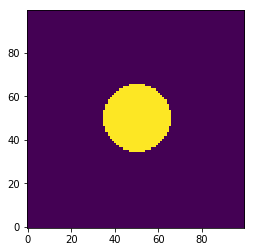

In [75]:
plt.imshow(sciImg_1st_bright, origin="lower")
plt.show()

In [76]:
mask_cube = np.zeros((11,100,100))
mask_cube[0,:,:] = sciImg_1st_bright
mask_cube[1,:,:] = ring_1st_to_2nd_bright
mask_cube[2,:,:] = upper_ring_2nd_to_3rd_bright
mask_cube[3,:,:] = lower_ring_2nd_to_3rd_bright
mask_cube[4,:,:] = section1_ring_3rd_to_4th_bright
mask_cube[5,:,:] = section2_ring_3rd_to_4th_bright
mask_cube[6,:,:] = section3_ring_3rd_to_4th_bright
mask_cube[7,:,:] = section1_gtr4th_bright
mask_cube[8,:,:] = section2_gtr4th_bright
mask_cube[9,:,:] = section3_gtr4th_bright
mask_cube[10,:,:] = section4_gtr4th_bright

In [78]:
summed_masks = np.sum(mask_cube, axis=1)

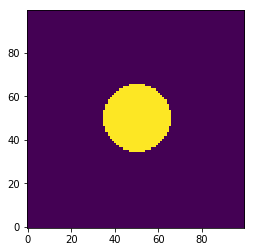

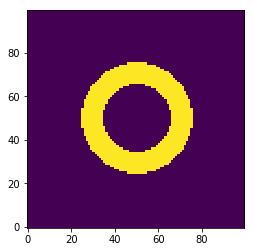

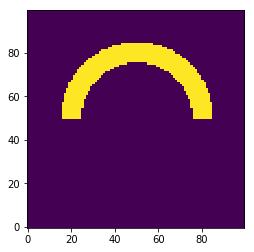

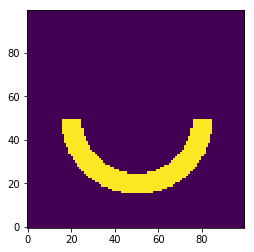

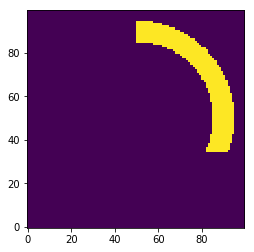

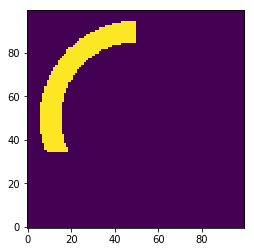

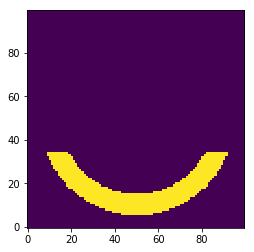

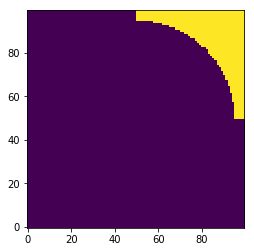

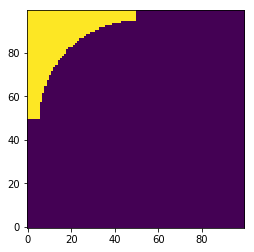

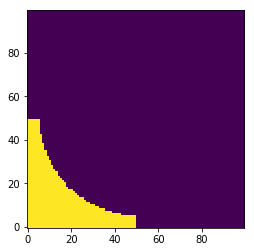

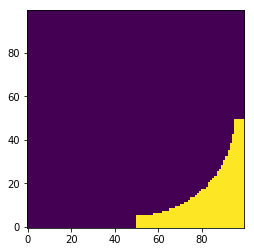

<Figure size 432x288 with 0 Axes>

In [82]:
for slice_num in range(0,len(mask_cube)):
    plt.imshow(mask_cube[slice_num,:,:], origin="lower")
    plt.show()
    plt.clf()

In [83]:
this_cube = mask_cube

In [87]:
hdu = fits.PrimaryHDU(mask_cube)
hdul = fits.HDUList([hdu])
#hdul.writeto('tesselation_10_psfs_in_each_region.fits', overwrite=True)

In [26]:
hdu = fits.PrimaryHDU(ring_11_to_21)
hdul = fits.HDUList([hdu])
hdul.writeto('mask_100x100_ring_11_to_21.fits', overwrite=True)

In [27]:
hdu = fits.PrimaryHDU(ring_21_to_28)
hdul = fits.HDUList([hdu])
hdul.writeto('mask_100x100_ring_21_to_28.fits', overwrite=True)

In [30]:
hdu = fits.PrimaryHDU(rad_gtr_28)
hdul = fits.HDUList([hdu])
hdul.writeto('mask_100x100_rad_gtr_28.fits', overwrite=True)

# Test to make sure there is no overlap between regions, or 
# regions not included

# Make plots of the tesselations

In [11]:
def get_cmap(N):
    ''' Returns a function that maps each index in 0, 1, ...
        N-1 to a distinct RGB color.'''
    color_norm  = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='hsv')
    #scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='gist_stern')
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color

In [12]:
from collections import OrderedDict
cmaps = OrderedDict()

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

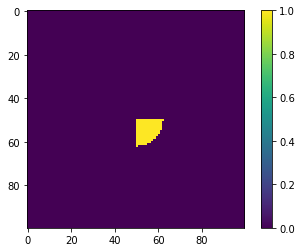

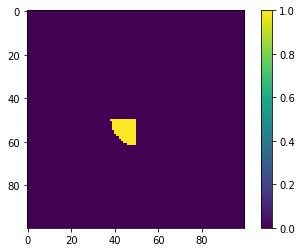

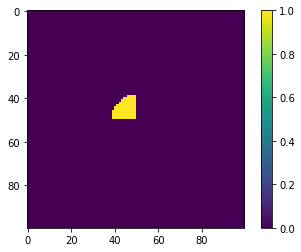

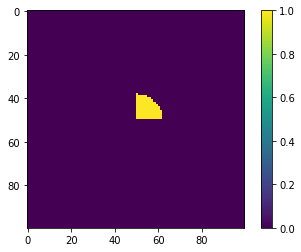

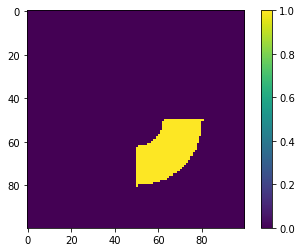

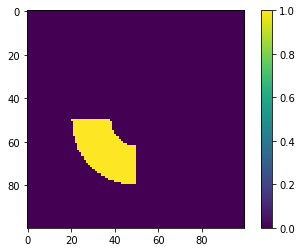

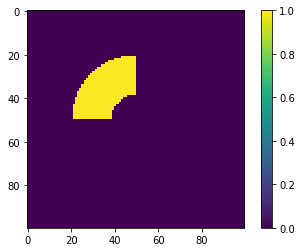

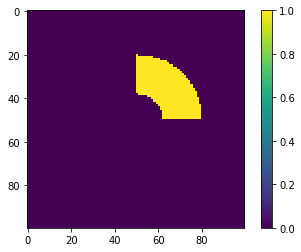

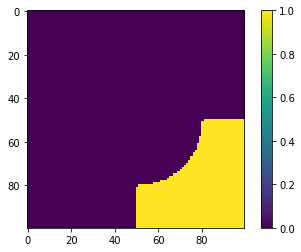

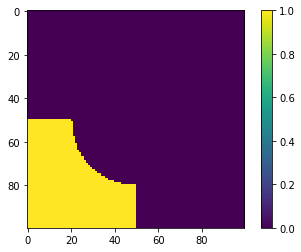

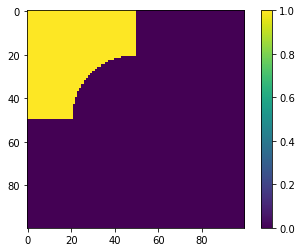

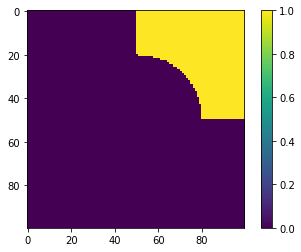

In [121]:
for t in range(0,len(this_cube)):
    plt.imshow(this_cube[t,:,:])
    plt.colorbar()
    plt.show()

In [123]:
# read in tesselation

inner_info, hdr = fits.getdata("tesselation_10_psfs_in_each_region.fits", 0, header=True)
inner_info[inner_info != 1] = 0

outer_info, hdr = fits.getdata("junk_mask_406x406_rings_4quad_complete.fits", 0, header=True)

# an add-on cube of seven layers that makes central 100x100 the same as that of the old tesselation
cube_addon = np.zeros((7,406,406))
cube_addon[:,153:253,153:253] = inner_info[0:7,:,:]

# put some stray pixels into one of the rings
#cube_addon[-1,idx[0],idx[1]] = 1

# concatenate
conc_cube = np.concatenate((cube_addon, outer_info), axis=0)

In [124]:
# write FITS
hdu = fits.PrimaryHDU(conc_cube.astype(int))
hdul = fits.HDUList([hdu])
#hdul.writeto('mask_406x406_rings_4quad.fits_complete.fits', overwrite=True)

In [77]:
# ... further modifications: chop >4 ring into quarters

section1_gtr4th_bright = np.copy(rad_gtr_4th_bright)
section1_gtr4th_bright[:50,:] = 0
section1_gtr4th_bright[:,:50] = 0

section2_gtr4th_bright = np.copy(rad_gtr_4th_bright)
section2_gtr4th_bright[:50,:] = 0
section2_gtr4th_bright[:,50:] = 0

section3_gtr4th_bright = np.copy(rad_gtr_4th_bright)
section3_gtr4th_bright[50:,:] = 0
section3_gtr4th_bright[:,50:] = 0

section4_gtr4th_bright = np.copy(rad_gtr_4th_bright)
section4_gtr4th_bright[50:,:] = 0
section4_gtr4th_bright[:,:50] = 0

In [112]:
idx = np.where(summed_masks != 1)

In [113]:
idx

(array([158, 159, 159, 159, 159, 160, 160, 160, 160, 161, 161, 161, 161,
        162, 162, 163, 163, 164, 164, 165, 165, 166, 166, 167, 167, 168,
        168, 169, 169, 170, 170, 173, 173, 174, 174, 175, 175, 176, 176,
        178, 178, 179, 179, 181, 181, 183, 183, 185, 185, 187, 187, 188,
        188, 190, 190, 191, 191, 194, 194, 195, 195, 203, 203, 211, 211,
        212, 212, 215, 215, 216, 216, 218, 218, 219, 219, 221, 221, 223,
        223, 225, 225, 227, 227, 228, 228, 230, 230, 231, 231, 232, 232,
        233, 233, 236, 236, 237, 237, 238, 238, 239, 239, 240, 240, 241,
        241, 242, 242, 243, 243, 244, 244, 245, 245, 245, 245, 246, 246,
        246, 246, 247, 247, 247, 247, 248]),
 array([203, 194, 195, 211, 212, 190, 191, 215, 216, 187, 188, 218, 219,
        185, 221, 183, 223, 181, 225, 179, 227, 178, 228, 176, 230, 175,
        231, 174, 232, 173, 233, 170, 236, 169, 237, 168, 238, 167, 239,
        166, 240, 165, 241, 164, 242, 163, 243, 162, 244, 161, 245, 161,
      

In [14]:
# read in a pre-existing mask and remove slices to make a truncated mask

original_tesselation_cube, hdr = fits.getdata("data/mask_406x406_rings_4quad_fits_complete.fits", 0, header=True)

# delete slices
truncated_tesselation_cube = np.delete(original_tesselation_cube, [0,22,38,54,70], axis=0)

#print(type(original_tesselation_cube[0,0,0]))
#plt.imshow(truncated_tesselation_cube[23,:,:])
#plt.show()

# write FITS
hdu = fits.PrimaryHDU(truncated_tesselation_cube.astype(int))
hdul = fits.HDUList([hdu])
#hdul.writeto('mask_406x406_rings_4quad_fits_truncated.fits', overwrite=True)

In [48]:
# read in a pre-existing mask and remove slices to make a truncated mask

original_tesselation_cube, hdr = fits.getdata("data/mask_406x406_rings_4quad_fits_complete.fits", 0, header=True)

# delete slices
truncated_tesselation_cube = np.delete(original_tesselation_cube, [0,22,38,54,70], axis=0)

#print(type(original_tesselation_cube[0,0,0]))
#plt.imshow(truncated_tesselation_cube[23,:,:])
#plt.show()

# write FITS
#hdu = fits.PrimaryHDU(truncated_tesselation_cube.astype(int))
#hdul = fits.HDUList([hdu])
#hdul.writeto('mask_406x406_rings_4quad_fits_truncated.fits', overwrite=True)

In [6]:
# read in a pre-existing mask

original_tesselation_cube, hdr = fits.getdata("data/mask_406x406_rings_4quad_fits_coarse_20200404.fits", 0, header=True)

In [15]:
# make regions from combinations of other regions

outer_1_ring_quad_I = np.sum(original_tesselation_cube[18:21,:,:], axis=0)
outer_1_ring_quad_IV = np.sum(original_tesselation_cube[33:36,:,:], axis=0)
outer_1_ring_quad_III = np.sum(original_tesselation_cube[48:51,:,:], axis=0)
outer_1_ring_quad_II = np.sum(original_tesselation_cube[63:66,:,:], axis=0)

outer_2_ring_quad_I = np.sum(original_tesselation_cube[15:18,:,:], axis=0)
outer_2_ring_quad_IV = np.sum(original_tesselation_cube[30:33,:,:], axis=0)
outer_2_ring_quad_III = np.sum(original_tesselation_cube[45:48,:,:], axis=0)
outer_2_ring_quad_II = np.sum(original_tesselation_cube[60:63:,:], axis=0)

outer_3_ring_quad_I = np.sum(original_tesselation_cube[12:15,:,:], axis=0)
outer_3_ring_quad_IV = np.sum(original_tesselation_cube[27:30,:,:], axis=0)
outer_3_ring_quad_III = np.sum(original_tesselation_cube[42:45,:,:], axis=0)
outer_3_ring_quad_II = np.sum(original_tesselation_cube[57:60,:,:], axis=0)

outer_4_ring_quad_I = np.sum(original_tesselation_cube[10:12,:,:], axis=0)
outer_4_ring_quad_IV = np.sum(original_tesselation_cube[25:27,:,:], axis=0)
outer_4_ring_quad_III = np.sum(original_tesselation_cube[40:42,:,:], axis=0)
outer_4_ring_quad_II = np.sum(original_tesselation_cube[55:57,:,:], axis=0)

outer_5_ring_quad_I = np.sum(original_tesselation_cube[8:10,:,:], axis=0)
outer_5_ring_quad_IV = np.sum(original_tesselation_cube[23:25,:,:], axis=0)
outer_5_ring_quad_III = np.sum(original_tesselation_cube[38:40,:,:], axis=0)
outer_5_ring_quad_II = np.sum(original_tesselation_cube[53:55,:,:], axis=0)

# replace individual slices from the merger
new_tesselation_cube = np.copy(original_tesselation_cube)

new_tesselation_cube[18,:,:] = outer_1_ring_quad_I
new_tesselation_cube[33,:,:] = outer_1_ring_quad_IV
new_tesselation_cube[48,:,:] = outer_1_ring_quad_III
new_tesselation_cube[63,:,:] = outer_1_ring_quad_II

new_tesselation_cube[15,:,:] = outer_2_ring_quad_I
new_tesselation_cube[30,:,:] = outer_2_ring_quad_IV
new_tesselation_cube[45,:,:] = outer_2_ring_quad_III
new_tesselation_cube[60,:,:] = outer_2_ring_quad_II

new_tesselation_cube[12,:,:] = outer_3_ring_quad_I
new_tesselation_cube[27,:,:] = outer_3_ring_quad_IV
new_tesselation_cube[42,:,:] = outer_3_ring_quad_III
new_tesselation_cube[57,:,:] = outer_3_ring_quad_II

new_tesselation_cube[10,:,:] = outer_4_ring_quad_I
new_tesselation_cube[25,:,:] = outer_4_ring_quad_IV
new_tesselation_cube[40,:,:] = outer_4_ring_quad_III
new_tesselation_cube[55,:,:] = outer_4_ring_quad_II

new_tesselation_cube[8,:,:] = outer_5_ring_quad_I
new_tesselation_cube[23,:,:] = outer_5_ring_quad_IV
new_tesselation_cube[38,:,:] = outer_5_ring_quad_III
new_tesselation_cube[53,:,:] = outer_5_ring_quad_II

# remove the other slices
coarser_tesselation_cube = np.delete(new_tesselation_cube, 
                                     [19,20,34,35,49,50,64,65,16,17,31,32,46,47,61,62,13,14,28,29,43,44,58,59,11,26,41,56,9,24,39,54], 
                                     axis=0)

# write FITS
hdu = fits.PrimaryHDU(np.array(coarser_tesselation_cube, dtype=np.int16))
hdul = fits.HDUList([hdu])
#hdul.writeto('mask_406x406_rings_4quad_fits_coarse_20200404.fits', overwrite=True)

In [7]:
# make regions from combinations of other regions

outer_1_ring_quad_I = np.sum(original_tesselation_cube[11:13,:,:], axis=0)
outer_1_ring_quad_IV = np.sum(original_tesselation_cube[18:20,:,:], axis=0)
outer_1_ring_quad_III = np.sum(original_tesselation_cube[25:27,:,:], axis=0)
outer_1_ring_quad_II = np.sum(original_tesselation_cube[32:34,:,:], axis=0)

outer_2_ring_quad_I = np.sum(original_tesselation_cube[9:11,:,:], axis=0)
outer_2_ring_quad_IV = np.sum(original_tesselation_cube[16:18,:,:], axis=0)
outer_2_ring_quad_III = np.sum(original_tesselation_cube[23:25,:,:], axis=0)
outer_2_ring_quad_II = np.sum(original_tesselation_cube[30:32:,:], axis=0)

# replace individual slices from the merger
new_tesselation_cube = np.copy(original_tesselation_cube)

new_tesselation_cube[11,:,:] = outer_1_ring_quad_I
new_tesselation_cube[18,:,:] = outer_1_ring_quad_IV
new_tesselation_cube[25,:,:] = outer_1_ring_quad_III
new_tesselation_cube[32,:,:] = outer_1_ring_quad_II

new_tesselation_cube[9,:,:] = outer_2_ring_quad_I
new_tesselation_cube[16,:,:] = outer_2_ring_quad_IV
new_tesselation_cube[23,:,:] = outer_2_ring_quad_III
new_tesselation_cube[30,:,:] = outer_2_ring_quad_II

# remove the other slices
coarser_tesselation_cube = np.delete(new_tesselation_cube, 
                                     [12,19,26,33,10,17,24,31], 
                                     axis=0)

# write FITS
hdu = fits.PrimaryHDU(np.array(coarser_tesselation_cube, dtype=np.int16))
hdul = fits.HDUList([hdu])
hdul.writeto('mask_406x406_rings_4quad_fits_coarse_junk.fits', overwrite=True)

These numbers should both be 1:
0
1
And here's a plot:


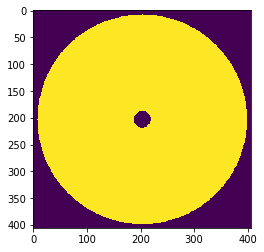

In [8]:
summed_masks = np.nansum(coarser_tesselation_cube, axis=0)

print("These numbers should both be 1:")
print(np.min(summed_masks))
print(np.max(summed_masks))

print("And here's a plot:")
plt.imshow(summed_masks)
plt.show()

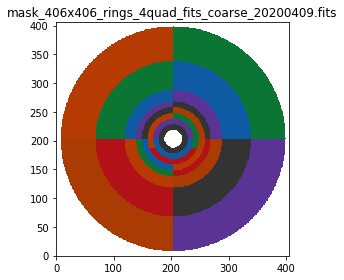

In [14]:
import matplotlib

this_cube = np.copy(coarser_tesselation_cube)
for plot_num in range(0,len(this_cube)):
    this_plot = this_cube[plot_num,:,:].astype('float')
    this_plot[this_plot == 0] = np.nan # this to a
    plt.imshow(this_plot,
               cmap = cmaps['Sequential'][np.mod(plot_num,7)], 
               alpha = 1, vmin=0, vmax=1.2,
               origin = "lower")#np.random.random())
    #plt.colorbar() # for some reason, colorbar necessary to render plot
plt.title("mask_406x406_rings_4quad_fits_coarse_20200409.fits")
plt.tight_layout()
#plt.show()
plt.savefig("junk.pdf")

In [4]:
# read in a pre-existing mask and remove slices to make a truncated mask

test_data_frame, hdr = fits.getdata("data/lm_180507_008812.fits", 0, header=True)

In [6]:
type(test_data_frame[0,0])

numpy.float32

In [49]:
len(original_tesselation_cube)

71